# Demo 1: Flow

## Background/Motivation

Flow is a fundamental driver of processes in the surface and subsurface. In this set of demonstrations we will introduce

  * Richards Model for variably saturated subsurface flow
  * Diffusion Wave model for overland flow (surface flow)
  * A fully coupled (integrated hydrology) model

For each model we will provide the mathematical equations, highlight information about the discretization and provide tips on setting boundary conditions, initial conditions, source terms and key parameters.

## Subsurface Flow (Richards Equation)

We can provide the essentials of the mathematical models using LaTeX.  For example, Richards (1931) model for variably saturated flow:

$\newcommand{porosity}{\phi}$
$\newcommand{dens}{n_l}$
$\newcommand{sat}{s}$
$\newcommand{flux}{\mathbf{q}}$
$\newcommand{krel}{k_r}$
$\newcommand{kabs}{\kappa}$
$\newcommand{viscosity}{\mu}$

$$
\begin{align}
  \frac{\partial}{\partial t} (\porosity \dens \sat) &+ \nabla \cdot \flux = 0 \\
  \flux &= - \dens \frac{\krel \kabs}{\viscosity} (\nabla p + \rho \mathbf{g})
\end{align}
$$

**Note that this uses latex macros defined in this cell.**

Blah, Blah, lots more about the model and equations ...


### Problem Specification

We consider three cases of the steady-state flux in a layered soil column 1[m] x 1 [m] x 2[m],

![Soil Column](soil-column-two-layers.png)

The presure profiles should match that in the Vanderborght paper. The difference between the cases is as follows:

  * case 1: is 0.5 m of clay and 1.5 m of sand;
  * case 2: is 0.5 m of loam and 1.5 m of sand;
  * case 3: is 1.5 m of loam and 0.5 m of sand.
  
 

In [1]:
matplotlib inline

In [2]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt

### ATS Input File Notes

I'm not sure the best way to step through and/or discuss the input file.  But we can highlight some key elements in a markdown cell.  For example, it would be really good to clarify boundary and initial conditions as these seem to give users significant problems.

**Initial Condition**

We set the initial water table at -3[m] below the surface, 

```xml
<ParameterList name="initial condition" type="ParameterList">
   <Parameter name="hydrostatic head [m]" type="double" value="-3" />
   <Parameter name="hydrostatic water density [kg m^-3]" type="double" value="1000" />
</ParameterList>
```
Where we note there is a dependence on a mesh parameter as well,

```xml
<Parameter name="build columns from set" type="string" value="surface" />
```
**Boundary Conditions**

Etc. Etc.


### Running ATS

In [8]:
# Note we can't get subprocess.PIPE to work within Docker, but os.system works fine.
os.system("mkdir richards-infiltration.demo")
os.system("(cd richards-infiltration.demo; ats --xml_file=../infiltration.xml 2>&1 > sim.stdout)")

ASCEMIO_Info: Preferred group size is set to nprocs/numIOgroups (1/1) 
ASCEMIO_Info: Preferred group size is set to 1 
ASCEMIO_Info: Preferred group size is set to nprocs/numIOgroups (1/1) 
ASCEMIO_Info: Preferred group size is set to 1 


0

### Visualize the Results

We should be clear about what the simulation shows physically about the system, and have some visualization that supports this narrative.

Defining some functions in python seems ok, but probably want to minimize in favor of using generic capabilities in the ATS tools.

In [9]:
def plot(dirname, title):
    """A generic plotting function that plots saturation as a function of depth."""
    fig = plt.figure()

    vis = ats_xdmf.VisFile(dirname, time_unit='d')
    vis.loadMesh(columnar=True)
    
    # plot the solution
    ax = fig.subplots(1,1)
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], ax, None, cmap='jet')

    ax.set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')
    

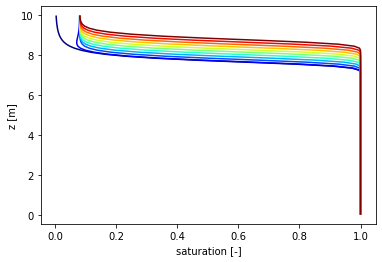

In [10]:
plot("./richards-infiltration.demo", "infiltration example")

## Overland Flow (Diffusion Wave Equation)

## Integrated Hydrology